#Classification in Neural Networks

In [ ]:
!nvidia-smi

Wed Jun 19 18:20:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import sklearn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles


# make 1000 samples
n_samples = 1000

# create cricles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [ ]:
len(X) , len(y)

(1000, 1000)

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
import matplotlib.pyplot as plt

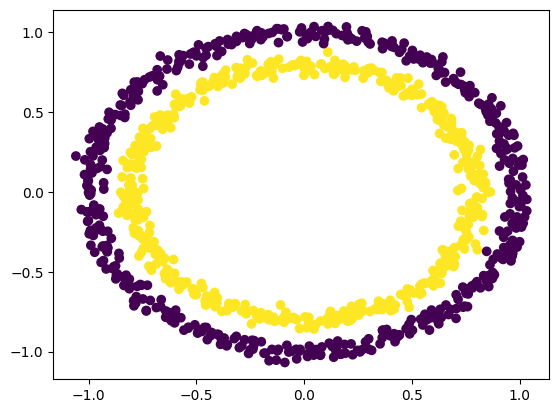

In [ ]:
plt.scatter(x=X[:,0],
            y =X[:,1],
            c=y)

1.1 Input nand output state

In [ ]:
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
import torch
import numpy

In [ ]:
# Turn the data into tensors
if not torch.is_tensor(X):
    X = torch.from_numpy(X).type(torch.float)
else:
    X = X.type(torch.float)

if not torch.is_tensor(y):
    y = torch.from_numpy(y).type(torch.float)
else:
    y = y.type(torch.float)



In [ ]:
X.dtype

torch.float32

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2, random_state = 42) #0.2 = 20% of data will be test set and other will be 80%

In [ ]:
# building a model

In [ ]:
import torch
from torch import nn

# Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import torch
import torch.nn as nn

class CircleModelV0(nn.Module):
    def __init__(self):
        super(CircleModelV0, self).__init__()
        # Create 2 nn.Linear layers capable of handling the shape of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    # Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

# Instantiate an instance of our model class and send it to the target device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_0 = CircleModelV0().to(device)
print(model_0)


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

In [ ]:
with torch.inference_mode():  # Use inference_mode for PyTorch 2.0.0 and later
    untrained_preds = model_0(X_test.to(device))

print(untrained_preds.shape)  # Print the shape of the predictions
print(untrained_preds[:10])

torch.Size([200, 1])
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Steup opiutmizer and loss function  

which loss function we can use

 this problem specifc

for regression you can use MAE and MSE

for classification you might want binary cross entropy

for opitimizer the two commons are SGD and Adam


In [ ]:
#Loss functtion
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
# Calculate the accuracyt of 100 of examples . what percent does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train Model

Lets train the model
1. Forward pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. Optimizer step(Gradient Descent)


In [ ]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
#1. View the 5 outputs od the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')

In [ ]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [ ]:
# Assuming y_pred_probs and model_0, X_test, device are already defined

# Round the predicted probabilities
y_preds = torch.round(y_pred_probs)

# Get predictions from the model and round them
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))[:5]

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds = y_preds.squeeze()

# Print the squeezed predictions to verify
print(y_preds)

tensor([True, True, True, True, True], device='cuda:0')
tensor([0., 0., 0., 0., 0.], device='cuda:0')


#3.2 Building a trainig and testing loop

In [ ]:
# Set manual seeds for reproducibility
torch.manual_seed(5)
torch.cuda.manual_seed(5)

# Set the number of epochs
epochs = 100

# Move data to target device (GPU or CPU)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Define the loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()  # Assuming binary classification
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

# Training and evaluation loop
for epoch in range(epochs):
    model_0.train()

    # Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train.float())
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimizer step (gradient descent)
    optimizer.step()

    # Testing (evaluation) mode
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate test loss and accuracy
        test_loss = loss_fn(test_logits, y_test.float())
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs} | "
              f"Train Loss: {loss.item():.4f} | Train Acc: {acc:.4f} | "
              f"Test Loss: {test_loss.item():.4f} | Test Acc: {test_acc:.4f}")

Epoch 0/100 | Train Loss: 0.6957 | Train Acc: 50.0000 | Test Loss: 0.6973 | Test Acc: 50.0000
Epoch 10/100 | Train Loss: 0.6946 | Train Acc: 50.0000 | Test Loss: 0.6963 | Test Acc: 50.0000
Epoch 20/100 | Train Loss: 0.6938 | Train Acc: 50.0000 | Test Loss: 0.6956 | Test Acc: 50.0000
Epoch 30/100 | Train Loss: 0.6933 | Train Acc: 43.6250 | Test Loss: 0.6952 | Test Acc: 45.5000
Epoch 40/100 | Train Loss: 0.6931 | Train Acc: 48.7500 | Test Loss: 0.6949 | Test Acc: 47.0000
Epoch 50/100 | Train Loss: 0.6930 | Train Acc: 50.1250 | Test Loss: 0.6947 | Test Acc: 46.0000
Epoch 60/100 | Train Loss: 0.6930 | Train Acc: 50.6250 | Test Loss: 0.6947 | Test Acc: 45.5000
Epoch 70/100 | Train Loss: 0.6930 | Train Acc: 51.2500 | Test Loss: 0.6947 | Test Acc: 45.5000
Epoch 80/100 | Train Loss: 0.6930 | Train Acc: 51.2500 | Test Loss: 0.6947 | Test Acc: 46.0000
Epoch 90/100 | Train Loss: 0.6930 | Train Acc: 51.3750 | Test Loss: 0.6947 | Test Acc: 45.5000


## 4. Make predictions and evaluate the model

In [ ]:
import requests
from pathlib import Path

# Check if the helper functions file already exists
if not Path("helper_functions.py").is_file():
    print("Downloading the helper functions...")
    response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(response.content)
else:
    print("helper_functions.py already exists.")

# Import the helper functions
from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists.


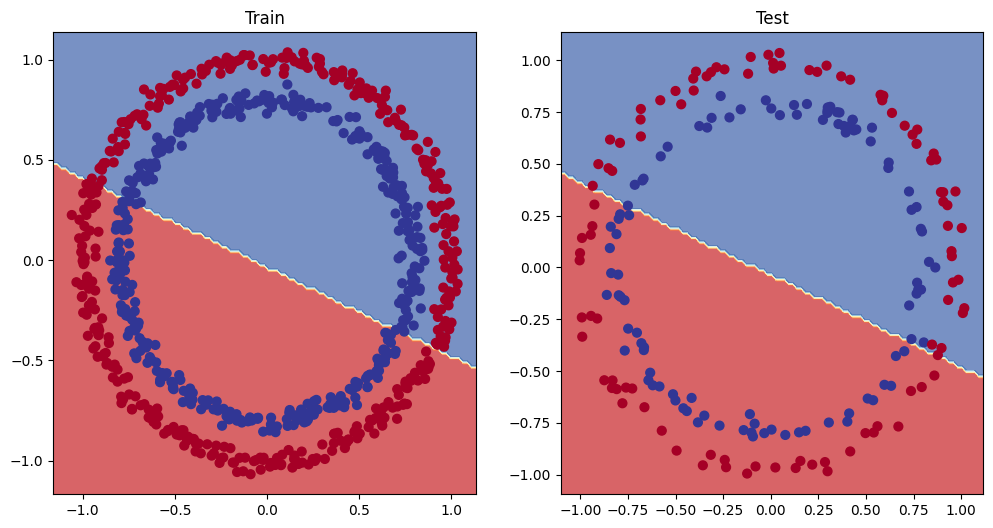

In [ ]:
plt.figure(figsize=(12, 6))

# Plot decision boundary for training data
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

# Plot decision boundary for test data
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

plt.show()

## 5.Impproving our model
* Add More layers
* Add more hidden layers
* Chaning the activation function
* chaning the learning rate
* changing the loss function


In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super(CircleModelV1, self).__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)
        return x

# Assuming 'device' is defined and set to either 'cpu' or 'cuda'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_1 = CircleModelV1().to(device)

# Print the model architecture
print(model_1)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# create a loss function

loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# Set manual seeds for reproducibility
torch.manual_seed(5)
torch.cuda.manual_seed(5)

# Set the number of epochs
epochs = 1000

# Move data to target device (GPU or CPU)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Define the loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()  # Assuming binary classification
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.1)

# Training and evaluation loop
for epoch in range(epochs):
    model_1.train()

    # Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train.float())
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimizer step (gradient descent)
    optimizer.step()

    # Testing (evaluation) mode
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate test loss and accuracy
        test_loss = loss_fn(test_logits, y_test.float())
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs} | "
              f"Train Loss: {loss.item():.4f} | Train Acc: {acc:.4f} | "
              f"Test Loss: {test_loss.item():.4f} | Test Acc: {test_acc:.4f}")

Epoch 0/1000 | Train Loss: 0.6944 | Train Acc: 50.0000 | Test Loss: 0.6903 | Test Acc: 50.0000
Epoch 10/1000 | Train Loss: 0.4647 | Train Acc: 89.1250 | Test Loss: 0.4476 | Test Acc: 89.0000
Epoch 20/1000 | Train Loss: 0.1687 | Train Acc: 99.2500 | Test Loss: 0.2587 | Test Acc: 90.5000
Epoch 30/1000 | Train Loss: 0.0742 | Train Acc: 99.5000 | Test Loss: 0.0992 | Test Acc: 98.5000
Epoch 40/1000 | Train Loss: 0.0260 | Train Acc: 100.0000 | Test Loss: 0.0500 | Test Acc: 100.0000
Epoch 50/1000 | Train Loss: 0.0138 | Train Acc: 100.0000 | Test Loss: 0.0275 | Test Acc: 100.0000
Epoch 60/1000 | Train Loss: 0.0091 | Train Acc: 100.0000 | Test Loss: 0.0220 | Test Acc: 100.0000
Epoch 70/1000 | Train Loss: 0.0066 | Train Acc: 100.0000 | Test Loss: 0.0182 | Test Acc: 100.0000
Epoch 80/1000 | Train Loss: 0.0051 | Train Acc: 100.0000 | Test Loss: 0.0159 | Test Acc: 100.0000
Epoch 90/1000 | Train Loss: 0.0043 | Train Acc: 100.0000 | Test Loss: 0.0142 | Test Acc: 100.0000
Epoch 100/1000 | Train Loss: 

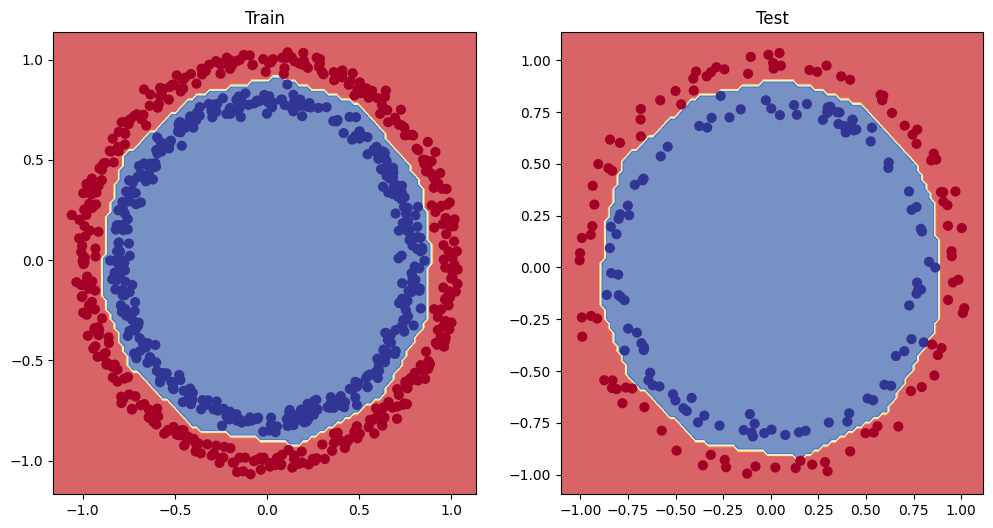

In [ ]:
plt.figure(figsize=(12, 6))

# Plot decision boundary for training data
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

# Plot decision boundary for test data
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

plt.show()

## 8. Putting all together with a multi class classification problem



#8.1 Creating a toy Mulit class dataset

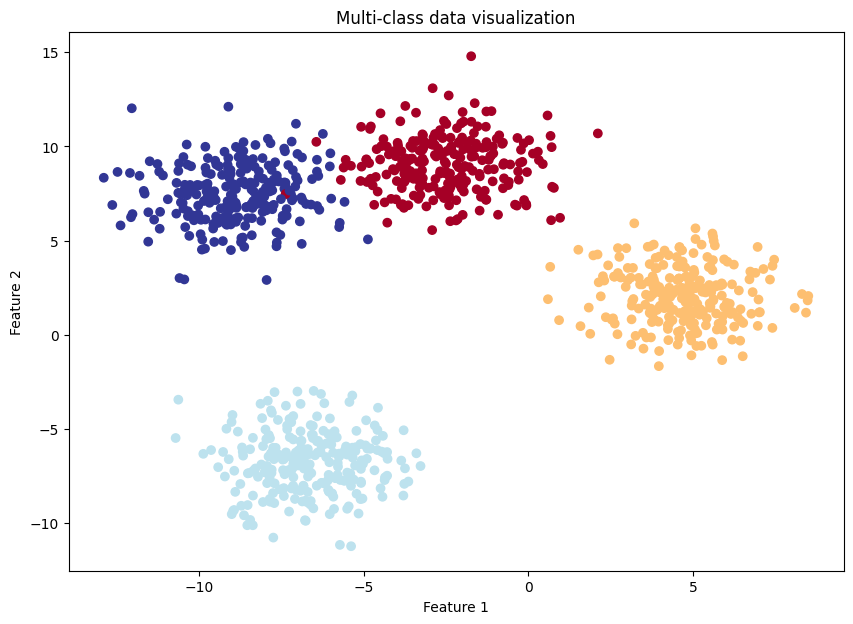

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. CREATE multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,  # give the clusters a little shake
                            random_state=RANDOM_SEED)

# 2. TURN DATA INTO TENSORS
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. Split the data into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                       y_blob,
                                                                       random_state=RANDOM_SEED)

# 4. PLOT THE DATA
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)
plt.title("Multi-class data visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 8.2 Multi class classifications model in pytorch

In [ ]:
# Create device agnositc code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


# Create an instance of BlobModel and send it to the device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

print(model_4)

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)


### 8.3 Create a Loss function


In [ ]:
# Create a loss Function for multi-classification

loss_fn = nn.CrossEntropyLoss()

# Create an Optimizer

optimizer = torch.optim.Adam(params=model_4.parameters(),
                             lr=0.1)



### 8.4 Getting prediction proabilities for a mulit class pytorch model

In [ ]:
# Ensure the model is in evaluation mode
model_4.eval()

# Use torch.no_grad() for inference to avoid gradient calculations
with torch.no_grad():
    y_preds = model_4(X_blob_test.to(device))

# Print the first 10 predictions
print(y_preds[:10])


tensor([[-0.7256, -0.2177,  0.6408, -0.0946],
        [-2.1013, -1.9228,  1.0266,  3.1560],
        [ 0.5143,  0.6676, -2.6941, -1.1090],
        [-0.2432,  0.2222, -0.2193, -0.7699],
        [-2.0516, -1.6457,  2.0012,  2.4049],
        [-2.4025, -2.2666,  1.2464,  3.7810],
        [ 0.7815,  0.9810, -2.8505, -1.6882],
        [-2.0169, -1.6712,  1.6772,  2.5243],
        [ 0.2326,  0.3084, -2.6606, -0.4140],
        [-1.9978, -1.6301,  1.7514,  2.4281]], device='cuda:0')


In [ ]:
# Convert logits to prediction probabilities using softmax
y_pred_probs = torch.softmax(y_preds, dim=1)

# Print the first 5 logits and their corresponding probabilities
print("Logits:")
print(y_preds[:5])
print("\nPrediction probabilities:")
print(y_pred_probs[:5])

Logits:
tensor([[-0.7256, -0.2177,  0.6408, -0.0946],
        [-2.1013, -1.9228,  1.0266,  3.1560],
        [ 0.5143,  0.6676, -2.6941, -1.1090],
        [-0.2432,  0.2222, -0.2193, -0.7699],
        [-2.0516, -1.6457,  2.0012,  2.4049]], device='cuda:0')

Prediction probabilities:
tensor([[0.1182, 0.1964, 0.4634, 0.2221],
        [0.0046, 0.0055, 0.1052, 0.8847],
        [0.4161, 0.4850, 0.0168, 0.0821],
        [0.2377, 0.3785, 0.2434, 0.1404],
        [0.0068, 0.0103, 0.3936, 0.5893]], device='cuda:0')


In [ ]:
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([2, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1,
        1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 2, 2,
        3, 3, 1, 3, 2, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3,
        1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3, 3, 2, 1, 2, 3, 1, 1,
        1, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 3, 1, 3, 3, 1, 3,
        1, 1, 1, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1, 1, 3, 2, 1, 1, 3, 3,
        1, 3, 1, 3, 3, 1, 1, 2, 2, 3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 1,
        2, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3, 3, 1, 2, 2, 3,
        1, 2, 1, 3, 3, 3, 3, 3, 1, 3], device='cuda:0')

In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

## # 8.4 Creating a training and testing loop

In [ ]:
import torch.optim as optim

# Define the loss function and accuracy function
loss_fn = nn.CrossEntropyLoss()

def accuracy_fn(y_true, y_preds):
    correct = (y_true == y_preds).sum().item()
    accuracy = correct / len(y_true)
    return accuracy

# Initialize the optimizer
optimizer = optim.Adam(model_4.parameters(), lr=0.1)

# Set seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set epochs
epochs = 1000

# Put the data on the device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through the data
for epoch in range(epochs):
    ### Model training
    model_4.train()

    # Forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # Compute loss
    loss = loss_fn(y_logits, y_blob_train.long())

    # Compute accuracy
    acc = accuracy_fn(y_true=y_blob_train, y_preds=y_pred)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.no_grad():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test.long())
        test_acc = accuracy_fn(y_true=y_blob_test, y_preds=test_preds)

        # Print out what's happening every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} | "
                  f"Train Loss: {loss.item():.4f} | Train Acc: {acc:.4f} | "
                  f"Test Loss: {test_loss.item():.4f} | Test Acc: {test_acc:.4f}")


Epoch 0/1000 | Train Loss: 2.4839 | Train Acc: 0.4107 | Test Loss: 2.9879 | Test Acc: 0.5000
Epoch 10/1000 | Train Loss: 0.0772 | Train Acc: 0.9853 | Test Loss: 0.0376 | Test Acc: 0.9920
Epoch 20/1000 | Train Loss: 0.0287 | Train Acc: 0.9893 | Test Loss: 0.0130 | Test Acc: 0.9960
Epoch 30/1000 | Train Loss: 0.0249 | Train Acc: 0.9920 | Test Loss: 0.0101 | Test Acc: 0.9960
Epoch 40/1000 | Train Loss: 0.0207 | Train Acc: 0.9947 | Test Loss: 0.0107 | Test Acc: 0.9960
Epoch 50/1000 | Train Loss: 0.0193 | Train Acc: 0.9947 | Test Loss: 0.0052 | Test Acc: 1.0000
Epoch 60/1000 | Train Loss: 0.0189 | Train Acc: 0.9933 | Test Loss: 0.0059 | Test Acc: 1.0000
Epoch 70/1000 | Train Loss: 0.0185 | Train Acc: 0.9960 | Test Loss: 0.0051 | Test Acc: 1.0000
Epoch 80/1000 | Train Loss: 0.0183 | Train Acc: 0.9960 | Test Loss: 0.0054 | Test Acc: 1.0000
Epoch 90/1000 | Train Loss: 0.0182 | Train Acc: 0.9933 | Test Loss: 0.0048 | Test Acc: 1.0000
Epoch 100/1000 | Train Loss: 0.0181 | Train Acc: 0.9933 | Tes

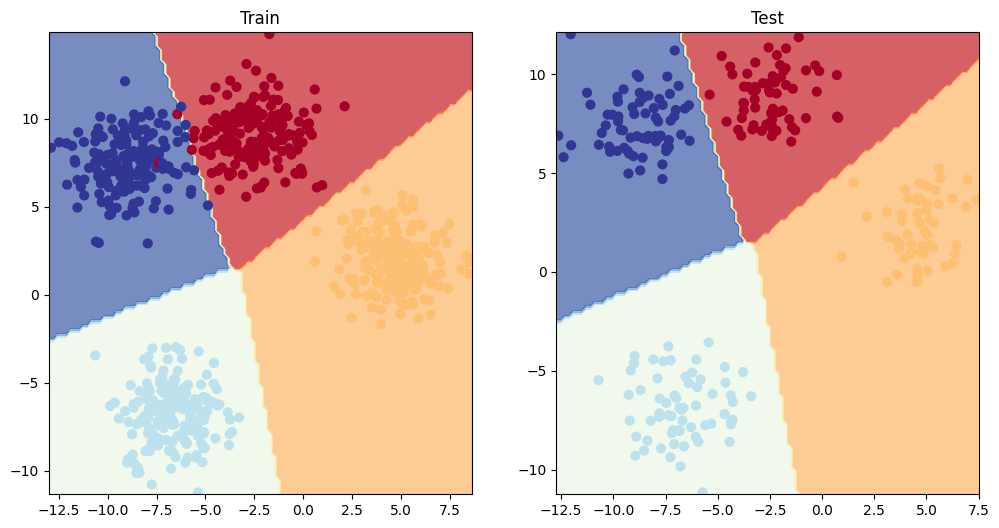

In [ ]:
plt.figure(figsize=(12, 6))

# Plot decision boundary for training data
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

# Plot decision boundary for test data
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

plt.show()